## 1절. 분류분석 개요

## 2절. 분류 모형

### 2.1 분류분석 모형의 종류

### 2.2 확률적 모형

### 2.3 확률적 생성모형

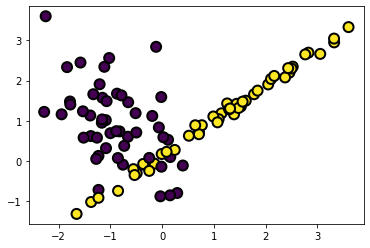

In [1]:
# 1. QDA (이차 판별 분석)
from sklearn.datasets import make_classification

X, y = make_classification(n_features=2, n_informative=2, n_redundant=0,
                            n_clusters_per_class=1, n_classes=2, random_state=9)

%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=100, edgecolors='k', linewidths=2)
plt.show()

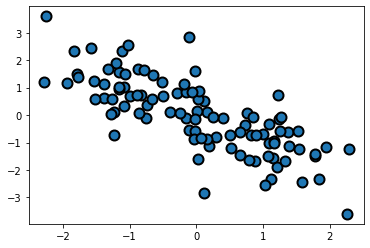

In [2]:
# 위의 데이터가 완벽한 대칭이 아님
# 예제 설명 위해 대칭구조로 데이터 수정
# y값 1인 데이터들을 y값이 0인 데이터들의 값을 반대 부호 갖도록 할당
X[y==1, :] = -(X[y==0, :])

plt.scatter(X[:, 0], X[:, 1], marker='o',
            s=100, edgecolors='k', linewidths=2)
plt.show()

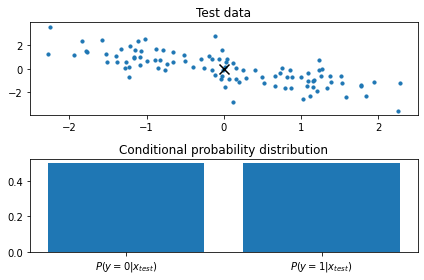

In [3]:
# QDA 모형 생성
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

model = QuadraticDiscriminantAnalysis()
model.fit(X, y)

# 주어진 위치의 데이터가 각 클래스에 속할 확률 구하기 => predict_proba()
x = [[0, 0]]
p = model.predict_proba(x)[0]

plt.subplot(211)
plt.scatter(X.T[0], X.T[1], s=10)
plt.scatter(x[0][0], x[0][1], c='k', s=100, marker='x')
plt.title('Test data')

plt.subplot(212)
plt.bar(model.classes_, p)
plt.title('Conditional probability distribution')
plt.xticks(model.classes_, ['$P(y=0|x_{test})$', '$P(y=1|x_{test})$'])
plt.tight_layout()
plt.show()

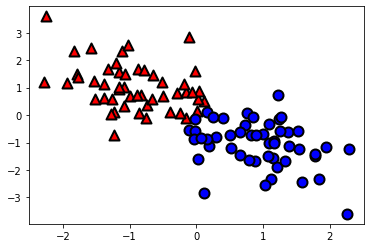

In [4]:
# QDA 모형을 이용해 분류 예측한 데이터의 클래스
h = model.predict(X)

plt.scatter(X[h==0, 0], X[h==0, 1], marker='^', c='r', s=100, edgecolors='k', linewidths=2)
plt.scatter(X[h==1, 0], X[h==1, 1], marker='o', c='b', s=100, edgecolors='k', linewidths=2)
plt.show()

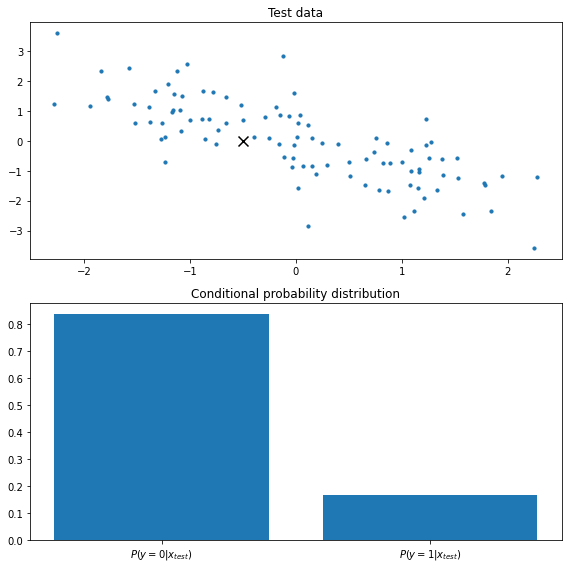

In [5]:
# 테스트 데이터가 y=0인 클래스에 더 가까울 시, P(y=0|x{test}) 가 0.5보다 커짐
x = [[-0.5, 0]]
p = model.predict_proba(x)[0]

plt.figure(figsize=(8,8))
plt.subplot(211)
plt.scatter(X.T[0], X.T[1], s=10)
plt.scatter(x[0][0], x[0][1], c='k', s=100, marker='x')
plt.title("Test data")

plt.subplot(212)
plt.bar(model.classes_, p)
plt.title("Conditional probability distribution")
plt.xticks(model.classes_, ["$P(y=0|x_{test})$", "$P(y=1|x_{test})$"])

plt.tight_layout()
plt.show()

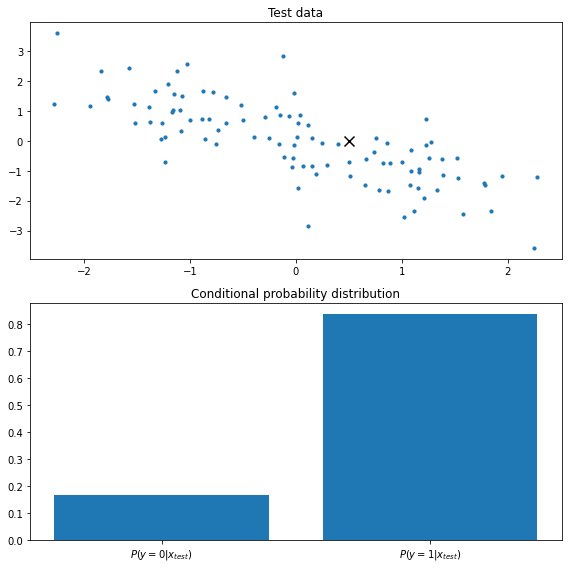

In [6]:
# 테스트 데이터가 y=1인 클래스에 더 가까울 시, P(y=1|x{test}) 가 0.5보다 커짐
x = [[0.5, 0]]
p = model.predict_proba(x)[0]

plt.figure(figsize=(8,8))
plt.subplot(211)
plt.scatter(X.T[0], X.T[1], s=10)
plt.scatter(x[0][0], x[0][1], c='k', s=100, marker='x')
plt.title("Test data")

plt.subplot(212)
plt.bar(model.classes_, p)
plt.title("Conditional probability distribution")
plt.xticks(model.classes_, ["$P(y=0|x_{test})$", "$P(y=1|x_{test})$"])

plt.tight_layout()
plt.show()

In [7]:
# 2. 나이브 베이즈 모형
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

iris = sns.load_dataset('iris')
X = iris.iloc[:, :-1]
y = iris.species

from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X, y)

test_X = [[5.0, 3.4, 1.2, 0.25]]
model.predict(test_X)

array(['setosa'], dtype='<U10')

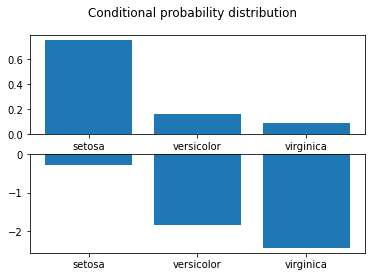

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.subplot(211)
plt.bar(model.classes_, model.predict_proba(test_X)[0])
plt.xticks(model.classes_)

plt.subplot(212)
plt.bar(model.classes_, model.predict_log_proba(test_X)[0])
plt.xticks(model.classes_)

plt.suptitle('Conditional probability distribution')
plt.show()

### 2.4 확률적 판별모형

In [9]:
# 1. 로지스틱 회귀모형
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import numpy as np

X, y = make_classification(n_features=1, n_redundant=0,
                            n_informative=1, n_clusters_per_class=1,
                            random_state=1)

model = LogisticRegression().fit(X, y)

xx = np.linspace(-3, 3, 100)
XX = xx[:, np.newaxis]
prob = model.predict_proba(XX)[:, 1]

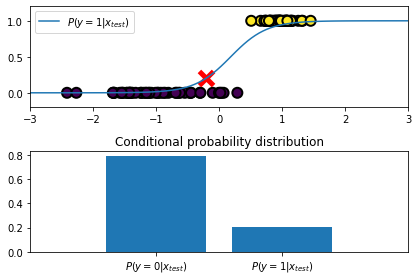

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

test_X = [[-0.2]]

plt.subplot(211)
plt.plot(xx, prob)
plt.scatter(X, y, marker='o', c=y, s=100, edgecolors='k', linewidths=2)
plt.scatter(test_X[0], model.predict_proba(test_X)[0][1:], marker='x', s=200, c='r', lw=5)
plt.xlim(-3, 3)
plt.ylim(-.2, 1.2)
plt.legend(['$P(y=1|x_{test})$'])

plt.subplot(212)
plt.bar(model.classes_, model.predict_proba(test_X)[0])
plt.xlim(-1, 2)
plt.gca().xaxis.grid(False)
plt.xticks(model.classes_, ['$P(y=0|x_{test})$', '$P(y=1|x_{test})$'])

plt.title('Conditional probability distribution')
plt.tight_layout()
plt.show()

In [11]:
# 2. 의사결정나무 모형
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

data = load_iris()
X = data.data[:, 2:]
y = data.target
feature_names = data.feature_names[2:]

dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0)
dt_model.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0)

In [12]:
import io
from sklearn.tree import export_graphviz
import pydot
from IPython.core.display import Image

def draw_decision_tree(model, feature_names=feature_names):
    # 문자열을 실제 파일 객체처럼 다루기 위함
    # 프로그램 정상 동작 여부 테스트 코드에 사용
    dot_buf = io.StringIO()
    export_graphviz(model, out_file=dot_buf, feature_names=feature_names)
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0]
    image = graph.create_png()

    return Image(image)

In [13]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, model, title):
    resolution = 0.01
    markers = ('s', '^', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = mpl.colors.ListedColormap(colors)

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                            np.arange(x2_min, x2_max, resolution))

    Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)

    plt.contour(xx1, xx2, Z, cmap=mpl.colors.ListedColormap(['k']))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,
                    c=[cmap(idx)], marker=markers[idx], s=80, label=cl)

    plt.xlabel(data.feature_names[2])
    plt.ylabel(data.feature_names[3])
    plt.legend(loc='upper left')
    plt.title(title)
    plt.show()

    return Z

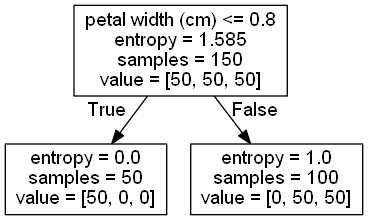

In [14]:
draw_decision_tree(dt_model, feature_names=data.feature_names[2:])

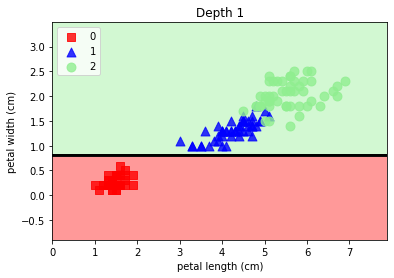

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

In [15]:
plot_decision_regions(X, y, dt_model, 'Depth 1')

In [16]:
dt_model5 = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
dt_model5.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

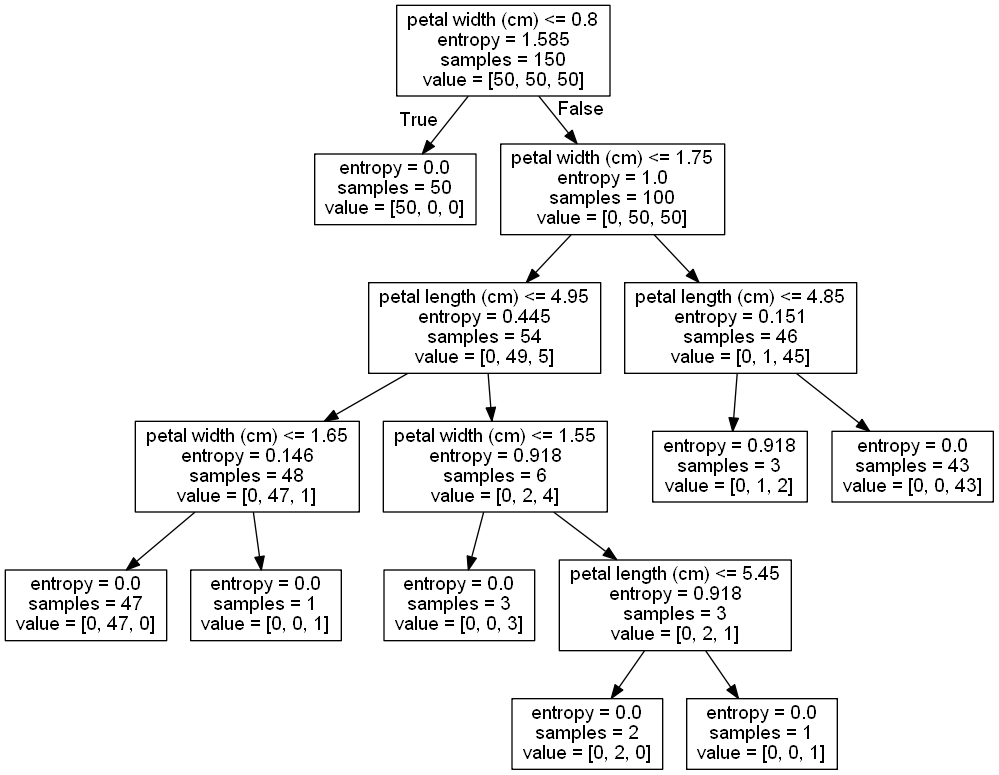

In [17]:
draw_decision_tree(dt_model5, feature_names=data.feature_names[2:])

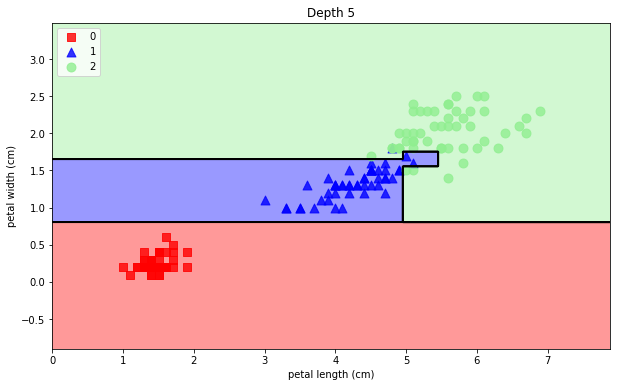

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]])

In [18]:
plt.figure(figsize=(10, 6))
plot_decision_regions(X, y, dt_model5, 'Depth 5')

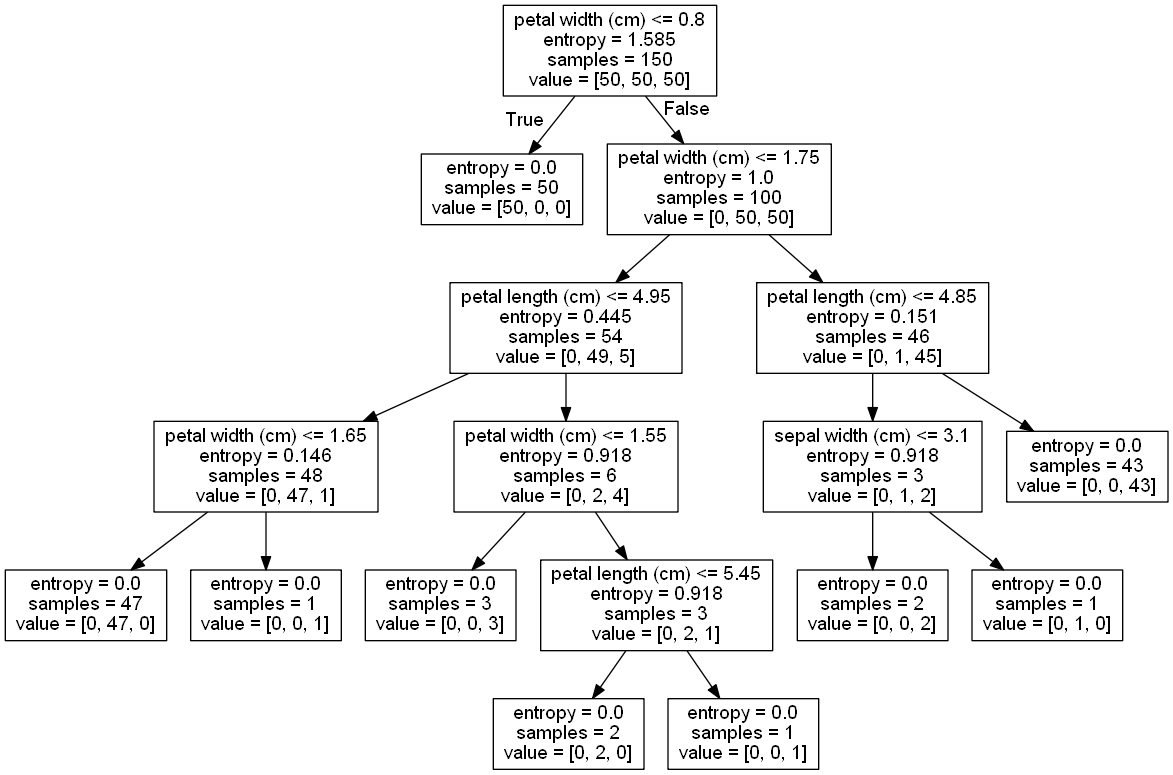

In [19]:
from sklearn.datasets import load_iris
data = load_iris()
X = data.data
y = data.target

feature_names = data.feature_names
dt_model6 = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0).fit(X, y)

draw_decision_tree(dt_model6, feature_names=feature_names)

### 2.5 판별함수 기반 모형

In [20]:
# 1. 퍼셉트론
from sklearn.datasets import load_iris
iris = load_iris()

# 오른쪽 인자로 준 배열요소가 타겟 속성에 있는지 확인
idx = np.in1d(iris.target, [0, 2])

X = iris.data[idx, 0:2]
y = iris.target[idx]

In [21]:
from sklearn.linear_model import Perceptron
model = Perceptron(max_iter=100, random_state=1).fit(X, y)

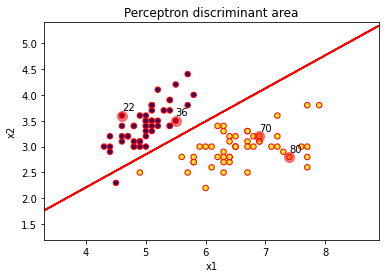

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

# x, y축 합계
X_min, X_max = X[:, 0].min() - 1, X[:, 0].max() + 1
Y_min, Y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# contour 그래프 시각화 시, xx, yy 2차원이어야 함.
XX, YY = np.meshgrid(np.linspace(X_min, X_max, 1000), np.linspace(Y_min, Y_max, 1000))
ZZ = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)

plt.contour(XX, YY, ZZ, colors='r')
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolor='r', linewidth=1)

idx = [22, 36, 70, 80]
plt.scatter(X[idx, 0], X[idx, 1], c='r', s=100, alpha=0.5)

for i in idx:
    plt.annotate(i, xy=(X[i, 0], X[i, 1] + 0.1))

plt.title('Perceptron discriminant area')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

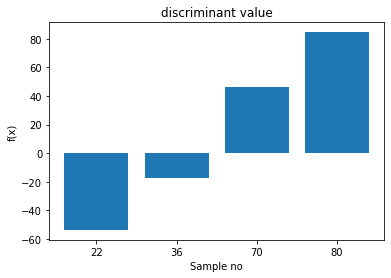

In [23]:
# data 판별함수 값 출력
plt.bar(range(len(idx)), model.decision_function(X[idx]))
plt.xticks(range(len(idx)), idx)
plt.title("discriminant value")
plt.xlabel("Sample no")
plt.ylabel("f(x)")
plt.show()

In [24]:
# 결정 초평면 시각화 in 3D
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, :2]
y = iris.target
idx = np.logical_or(iris.target == 0, iris.target == 1)
X = iris.data[idx, :3]
y = iris.target[idx]

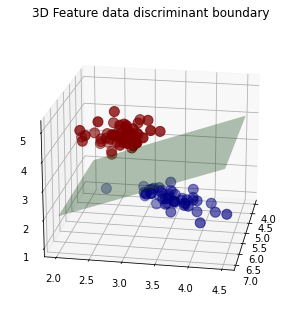

In [25]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax = Axes3D(fig, elev=20, azim=10)

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, marker='o', s=100, cmap=mpl.cm.jet)
ax.plot_surface(np.array([[4, 4], [7, 7]]), np.array([[2, 4.5], [2, 4.5]]), np.array([[2, 4], [2, 4]]), color='g', alpha=.3)

plt.title("3D Feature data discriminant boundary")
plt.show()

In [26]:
# 2. 커널 SVM
import numpy as np
xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))
np.random.seed(0)

X = np.random.randn(300, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

In [27]:
from sklearn.svm import NuSVC
model = NuSVC().fit(X, Y)

Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

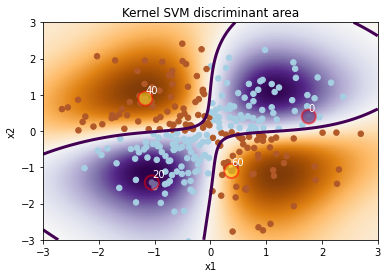

In [28]:
import matplotlib.pyplot as plt

plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
              origin='lower', cmap=plt.cm.PuOr_r)

contours = plt.contour(xx, yy, Z, levels=[0], linewidths=3)
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired)

idx = [0, 20, 40, 60]
plt.scatter(X[idx, 0], X[idx, 1], c=Y[idx], s=200, alpha=0.5, edgecolor='r', linewidth=2)

for i in idx:
    plt.annotate(i, xy=(X[i, 0], X[i, 1]+0.15), color='white')

plt.grid(False)
plt.axis([-3, 3, -3, 3])

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Kernel SVM discriminant area")

plt.show()

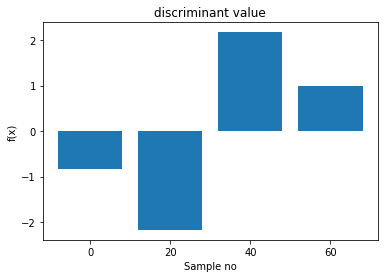

In [29]:
plt.bar(range(len(idx)), model.decision_function(X[idx]))
plt.xticks(range(len(idx)), idx)
plt.title("discriminant value")
plt.xlabel("Sample no")
plt.ylabel("f(x)")
plt.show()

### 2.6 다중 클래스 분류

In [1]:
# 1. OvO (One-Vs-One)
from sklearn.datasets import load_iris
iris = load_iris()

from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import LogisticRegression

model_ovo = OneVsOneClassifier(LogisticRegression())
model_ovo.fit(iris.data, iris.target)

OneVsOneClassifier(estimator=LogisticRegression())

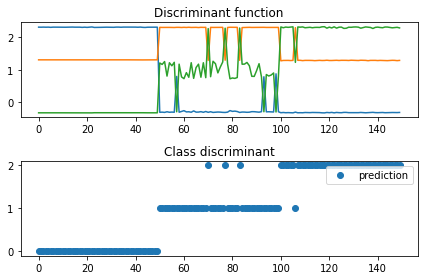

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

ax1 = plt.subplot(211)
pd.DataFrame(model_ovo.decision_function(iris.data)).plot(ax=ax1, legend=False)

plt.title('Discriminant function')

ax2 = plt.subplot(212)
pd.DataFrame(model_ovo.predict(iris.data), columns=['prediction']).plot(marker='o', ls='', ax=ax2)

plt.title('Class discriminant')

plt.tight_layout()
plt.show()

In [1]:
# 2. OvR (One-vs-the-Rest)
from sklearn.datasets import load_iris
iris = load_iris()

from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

model_ovr = OneVsRestClassifier(LogisticRegression())
model_ovr.fit(iris.data, iris.target)

OneVsRestClassifier(estimator=LogisticRegression())

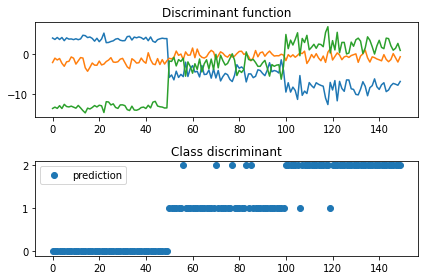

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

ax1 = plt.subplot(211)
pd.DataFrame(model_ovr.decision_function(iris.data)).plot(ax=ax1, legend=False)

plt.title('Discriminant function')

ax2 = plt.subplot(212)
pd.DataFrame(model_ovr.predict(iris.data), columns=['prediction']).plot(marker='o', ls='', ax=ax2)

plt.title('Class discriminant')

plt.tight_layout()
plt.show()

## 3절. 인공신경망

In [19]:
# mlp classifier
from sklearn.datasets import load_iris
iris = load_iris()
iris_X = iris.data
iris_y = iris.target

In [20]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(iris_X, iris_y, test_size=0.3, random_state=1)

In [22]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(50,50,30), max_iter=500)
mlp.fit(train_X, train_y)

MLPClassifier(hidden_layer_sizes=(50, 50, 30), max_iter=500)

In [23]:
import pandas as pd
pred = mlp.predict(test_X)
pd.crosstab(test_y, pred)

col_0,0,1,2
row_0,,,
0,14,0,0
1,0,18,0
2,0,0,13


In [24]:
mlp.score(test_X, test_y)

1.0

In [25]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
import numpy as np
from sklearn.datasets import make_moons, make_circles, make_classification

In [32]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)

datasets = [
            make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            (X, y)
        ]

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

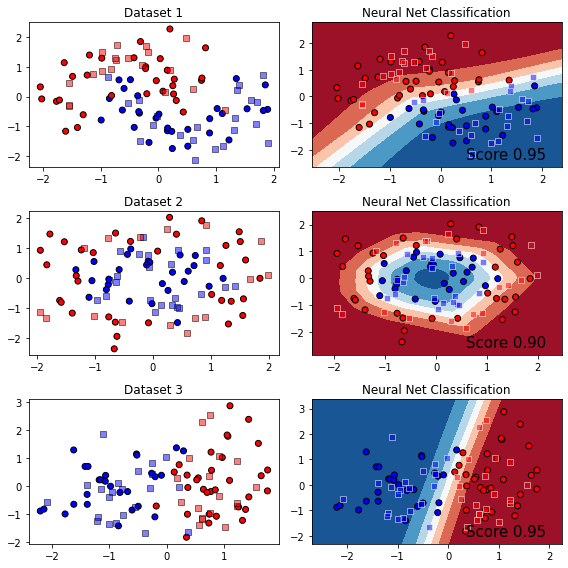

In [35]:
# 그래프 영역 초기화, 인공신경망 분류모형 생성 및 시각화
figure = plt.figure(figsize=(8, 8))

# 데이터셋마다 반복
for ds_cnt, ds in enumerate(datasets):
    # 데이터셋을 학습 및 검증 데이터로 분할
    X, y = ds
    X = StandardScaler().fit_transform(X)
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

    # 데이터셋 그리기 위한 설정
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])

    # dataset ax
    ax = plt.subplot(len(datasets), 2, 2*ds_cnt+1)
    ax.set_title(f'Dataset {ds_cnt+1}')

    # 학습데이터의 산점도
    ax.scatter(train_X[:, 0], train_X[:, 1], c=train_y, cmap=cm_bright, edgecolors='k')

    # 검증데이터의 산점도
    ax.scatter(test_X[:, 0], test_X[:, 1], c=test_y, cmap=cm_bright, edgecolors='k', marker='s', alpha=0.5)

    # modeling ax
    ax2 = plt.subplot(len(datasets), 2, 2*(ds_cnt+1))

    # 분류모형 생성 및 예측
    model = MLPClassifier(alpha=1, max_iter=1000)
    model.fit(train_X, train_y)
    train_pred = model.predict(train_X)
    test_pred = model.predict(test_X)
    score = model.score(test_X, test_y)

    # 결정경계 생성
    if hasattr(model, 'decision_function'):
        Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # 채워진 등고선 이용해 결정경계 시각화
    Z = Z.reshape(xx.shape)
    ax2.contourf(xx, yy, Z, cmap=cm)

    # 학습 데이터의 분류 예측 결과를 산점도로 시각화
    ax2.scatter(train_X[:, 0], train_X[:, 1], c=train_pred, cmap=cm_bright, edgecolor='k')

    # 검증 데이터의 분류 예측 결과를 산점도로 시각화
    ax2.scatter(test_X[:, 0], test_X[:, 1], c=test_pred, cmap=cm_bright, edgecolors='w', marker='s', alpha=0.5)

    ax2.set_title('Neural Net Classification')
    ax2.text(xx.max() - 0.3, yy.min() + 0.3, ('Score %.2f'%score).lstrip('0'),
                size=15, horizontalalignment='right')

plt.tight_layout()
plt.show()

## 4절. 분류 모형 성능평가

### 4.1 사이킷런의 모형 평가 방법

### 4.2 분류모형 평가를 위한 scoring 속성

### 4.3 성능평가 함수

### 4.4 Confusion Matrix 분류 결과표

### 4.5 분류표 API

In [36]:
y_true = [1, 1, 0, 0, 2, 1, 0, 2, 2]
y_pred = [1, 1, 0, 1, 1, 0, 0, 2, 1]

from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

array([[2, 1, 0],
       [1, 2, 0],
       [0, 2, 1]], dtype=int64)

In [37]:
import pandas as pd
df = pd.DataFrame({'y_true':y_true, 'y_pred':y_pred})
pd.crosstab(df.y_true, df.y_pred, margins=True)
# margin 인자 true일 시, 행/열별 합 같이 출력

y_pred,0,1,2,All
y_true,,,,
0,2,1,0,3
1,1,2,0,3
2,0,2,1,3
All,3,5,1,9


### 4.6 혼동행렬을 이용한 평가 방법

In [39]:
# f1 score
def fmeasure(table):
    precision = table[1, 1] / (table[0, 1] + table[1, 1]) # tp / (fp+tp)
    recall = table[1, 1] / (table[1, 0] + table[1, 1]) # tp / (fn+tp)
    return (2*precision*recall / (precision+recall))

table = np.array([[1613, 22], [81, 77]])
fmeasure(table)

0.5992217898832685

In [40]:
# sklearn metrics library
res = pd.read_csv('http://javaspecialist.co.kr/pds/382')
res.head()

,CUST_ID,y_true,y_pred
0,37,0,0
1,51,0,0
2,60,0,0
3,65,0,0
4,73,0,0


In [41]:
# 혼동행렬, 분류표 도출
pd.crosstab(res.y_true, res.y_pred)

y_pred,0,1
y_true,,
0,1613,22
1,81,77


In [42]:
# accuracy = (tp+tn) / (tp+tn+fp+fn)
from sklearn.metrics import accuracy_score
accuracy_score(res.y_true, res.y_pred)

0.9425543781372002

In [43]:
# precision = tp / (tp+fp)
from sklearn.metrics import precision_score
precision_score(res.y_true, res.y_pred)

0.7777777777777778

In [44]:
# recall = tp / (tp+fn)
from sklearn.metrics import recall_score
recall_score(res.y_true, res.y_pred)

0.4873417721518987

In [45]:
# 특이도 specificity = tn / (tn+fp)
recall_score(res.y_true, res.y_pred, pos_label=0)

0.9865443425076452

In [46]:
# fall-out (위양성율) = fp / (tn+fp)
specificity = recall_score(res.y_true, res.y_pred, pos_label=0)
fallout = 1 - specificity
fallout

0.013455657492354778

In [47]:
# f beta score aka f1-score
from sklearn.metrics import f1_score
f1_score(res.y_true, res.y_pred)

0.5992217898832685

In [52]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(res.y_true, res.y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1635
           1       0.78      0.49      0.60       158

    accuracy                           0.94      1793
   macro avg       0.86      0.74      0.78      1793
weighted avg       0.94      0.94      0.94      1793



### 4.7 ROC & AUC

In [1]:
# 1. roc curve
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=0)

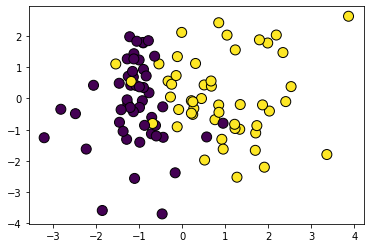

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100, edgecolor='k')
plt.show()

In [3]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)
model.fit(X, y)

LogisticRegression(random_state=0)

In [4]:
y_pred = model.predict(X)
f_value = model.decision_function(X)

In [5]:
import numpy as np
import pandas as pd

df = pd.DataFrame(np.c_[f_value, y_pred, y], columns=['f_value', 'y_pred', 'y_true'])
df.sort_values('f_value', ascending=False, inplace=True)
df.reset_index(drop=True, inplace=True)
df

,f_value,y_pred,y_true
0,11.454496,1.0,1.0
1,8.170554,1.0,1.0
2,7.143225,1.0,1.0
3,7.111102,1.0,1.0
4,7.018470,1.0,1.0
...,...,...,...
95,-5.587140,0.0,0.0
96,-5.607419,0.0,0.0
97,-5.707310,0.0,0.0
98,-6.484490,0.0,0.0


In [6]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred)

array([[48,  2],
       [ 5, 45]], dtype=int64)

In [7]:
from sklearn.metrics import recall_score
recall_score(y, y_pred)

0.9

In [8]:
from sklearn.metrics import recall_score
specificity = recall_score(y, y_pred, pos_label=0)
fallout = 1 - specificity
fallout

0.040000000000000036

In [9]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y, model.decision_function(X))
fpr, tpr, thresholds

(array([0.  , 0.  , 0.  , 0.02, 0.02, 0.04, 0.04, 0.36, 0.36, 0.6 , 0.6 ,
        0.76, 0.76, 1.  ]),
 array([0.  , 0.02, 0.46, 0.46, 0.66, 0.66, 0.94, 0.94, 0.96, 0.96, 0.98,
        0.98, 1.  , 1.  ]),
 array([12.45449559, 11.45449559,  2.6601419 ,  2.65484312,  1.60696234,
         1.50599055, -0.16668978, -1.40700746, -1.408684  , -1.92632464,
        -2.02228104, -2.55383198, -2.65345426, -7.86293217]))

In [10]:
fpr, tpr, thresholds = roc_curve(y, model.predict_proba(X)[:, 1])
fpr, tpr, thresholds

(array([0.  , 0.  , 0.  , 0.02, 0.02, 0.04, 0.04, 0.36, 0.36, 0.6 , 0.6 ,
        0.76, 0.76, 1.  ]),
 array([0.  , 0.02, 0.46, 0.46, 0.66, 0.66, 0.94, 0.94, 0.96, 0.96, 0.98,
        0.98, 1.  , 1.  ]),
 array([1.99998940e+00, 9.99989398e-01, 9.34633336e-01, 9.34308867e-01,
        8.32989220e-01, 8.18466246e-01, 4.58423779e-01, 1.96706488e-01,
        1.96441708e-01, 1.27157945e-01, 1.16883333e-01, 7.21694707e-02,
        6.57764272e-02, 3.84596109e-04]))

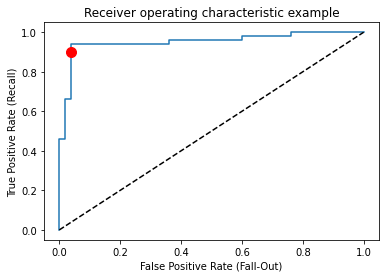

In [11]:
# roc curve visualization
%matplotlib inline
import matplotlib.pyplot as plt

recall = recall_score(y, y_pred)
fallout = 1 - recall_score(y, y_pred, pos_label=0)

plt.plot(fpr, tpr, label="Logistic Regression")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.plot([fallout], [recall], 'ro', ms=10)

plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic example')

plt.show()

In [12]:
# 2. roc curve를 이용한 성능비교
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, weights=[0.95, 0.05], random_state=5)

In [13]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression().fit(X, y)
pred1 = model1.predict(X)

In [14]:
from sklearn.svm import SVC
model2 = SVC(gamma=0.0001, C=3000, probability=True).fit(X, y)
pred2 = model2.predict(X)

In [15]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, pred1))

[[940   3]
 [ 30  27]]


In [16]:
print(confusion_matrix(y, pred2))

[[940   3]
 [ 30  27]]


In [17]:
from sklearn.metrics import classification_report
print(classification_report(y, pred1))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       943
           1       0.90      0.47      0.62        57

    accuracy                           0.97      1000
   macro avg       0.93      0.74      0.80      1000
weighted avg       0.97      0.97      0.96      1000



In [18]:
print(classification_report(y, pred2))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       943
           1       0.90      0.47      0.62        57

    accuracy                           0.97      1000
   macro avg       0.93      0.74      0.80      1000
weighted avg       0.97      0.97      0.96      1000



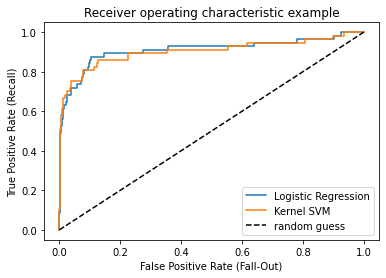

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr1, tpr1, thresholds1 = roc_curve(y, model1.decision_function(X))
fpr2, tpr2, thresholds1 = roc_curve(y, model2.decision_function(X))

plt.plot(fpr1, tpr1, label="Logistic Regression")
plt.plot(fpr2, tpr2, label="Kernel SVM")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")

plt.legend()

plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic example')

plt.show()

In [21]:
# 3. AUC (Area Under the Curve)
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, weights=[0.95, 0.05], random_state=5)

In [22]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression().fit(X, y)

from sklearn.svm import SVC
model2 = SVC(gamma=0.0001, C=3000, probability=True).fit(X, y)

In [23]:
from sklearn.metrics import roc_curve
fpr1, tpr1, thresholds1 = roc_curve(y, model1.decision_function(X))
fpr2, tpr2, thresholds1 = roc_curve(y, model2.decision_function(X))

In [24]:
from sklearn.metrics import auc
auc(fpr1, tpr1), auc(fpr2, tpr2)

(0.9112202563673234, 0.9037227214377407)

In [28]:
# 4. 다중 클래스의 ROC 커브
from sklearn.datasets import load_iris
from sklearn.preprocessing import label_binarize
iris = load_iris()
X = iris.data
y = label_binarize(iris.target, classes=[0, 1, 2])

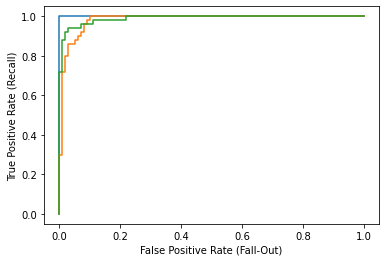

In [29]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

fpr = [None] * 3
tpr = [None] * 3
thr = [None] * 3

for i in range(3):
    model = GaussianNB().fit(X, y[:, i])
    fpr[i], tpr[i], thr[i] = roc_curve(y[:, i], model.predict_proba(X)[:, 1])
    plt.plot(fpr[i], tpr[i])

plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.show()

## 5절. 연습문제

In [57]:
import pandas as pd
wine_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [58]:
X = wine_df.iloc[:, :-1]
y = wine_df.iloc[:, -1]

In [60]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=1)

In [61]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(50, 30, 30))
model.fit(train_X, train_y)

MLPClassifier(hidden_layer_sizes=(50, 30, 30))

In [66]:
# 교차분류표
pred = model.predict(test_X)
pd.crosstab(test_y, pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,5,6,7,All
True,,,,
3,2,0,0,2
4,17,4,0,21
5,170,36,1,207
6,83,105,7,195
7,9,26,17,52
8,1,0,2,3
All,282,171,27,480


In [64]:
# accuracy
from sklearn.metrics import accuracy_score
accuracy_score(test_y, pred)

0.6083333333333333